In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
path = r"C:\Users\udmul\Documents\LingualSense\Data\Language Detection.csv"

In [9]:
# Replace 'path' with the actual file path
df0 = pd.read_csv(path, encoding='utf-8')  # Try this encoding

In [11]:
path2= r"C:\Users\udmul\Downloads\archive (3)\dataset.csv"

In [13]:
df1 = pd.read_csv(path2,encoding='utf-8')  # Try this encoding

In [15]:
df = pd.concat([df0, df1], axis=0, ignore_index=True)

In [17]:
df

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
32332,hors du terrain les années et sont des année...,French
32333,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...,Thai
32334,con motivo de la celebración del septuagésimoq...,Spanish
32335,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...,Chinese


In [19]:
df.shape

(32337, 2)

In [21]:
df.describe()

,Text,Language
count,32337,32337
unique,32117,30
top,haec commentatio automatice praeparata res ast...,English
freq,48,2385


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32337 entries, 0 to 32336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      32337 non-null  object
 1   Language  32337 non-null  object
dtypes: object(2)
memory usage: 505.4+ KB


In [25]:
df.isnull().sum()

Text        0
Language    0
dtype: int64

In [27]:
df.nunique()

Text        32117
Language       30
dtype: int64

In [29]:
language_counts = df['Language'].value_counts()
print(language_counts.head(31))

Language
English       2385
French        2014
Spanish       1819
Russian       1692
Dutch         1546
Arabic        1536
Turkish       1474
Tamil         1469
Hindi         1063
Persian       1000
Pushto        1000
Thai          1000
Korean        1000
Chinese       1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Japanese      1000
Romanian      1000
Swedish       1000
Estonian      1000
Portugeese     739
Italian        698
Sweedish       676
Malayalam      594
German         470
Danish         428
Kannada        369
Greek          365
Name: count, dtype: int64


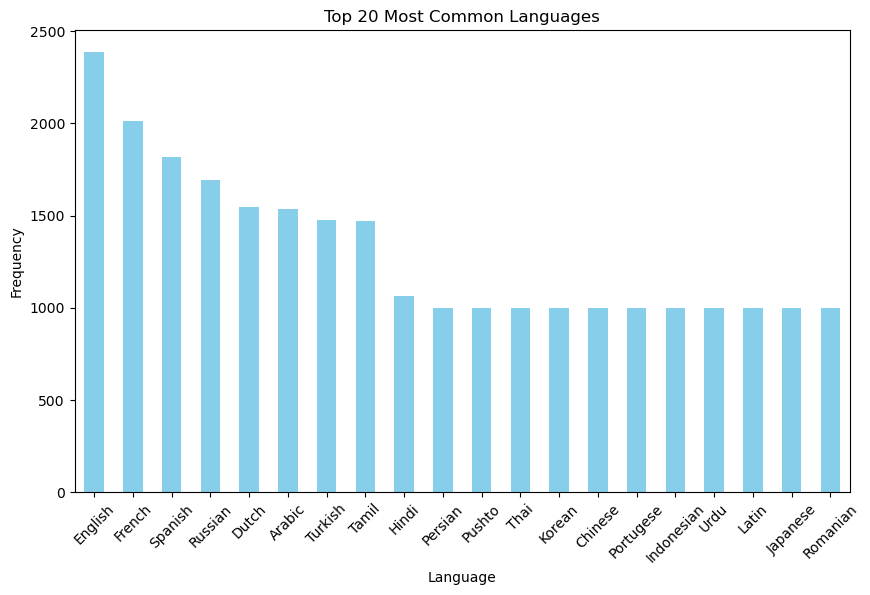

In [31]:
plt.figure(figsize=(10, 6))
language_counts.head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Most Common Languages')
plt.xlabel('Language')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

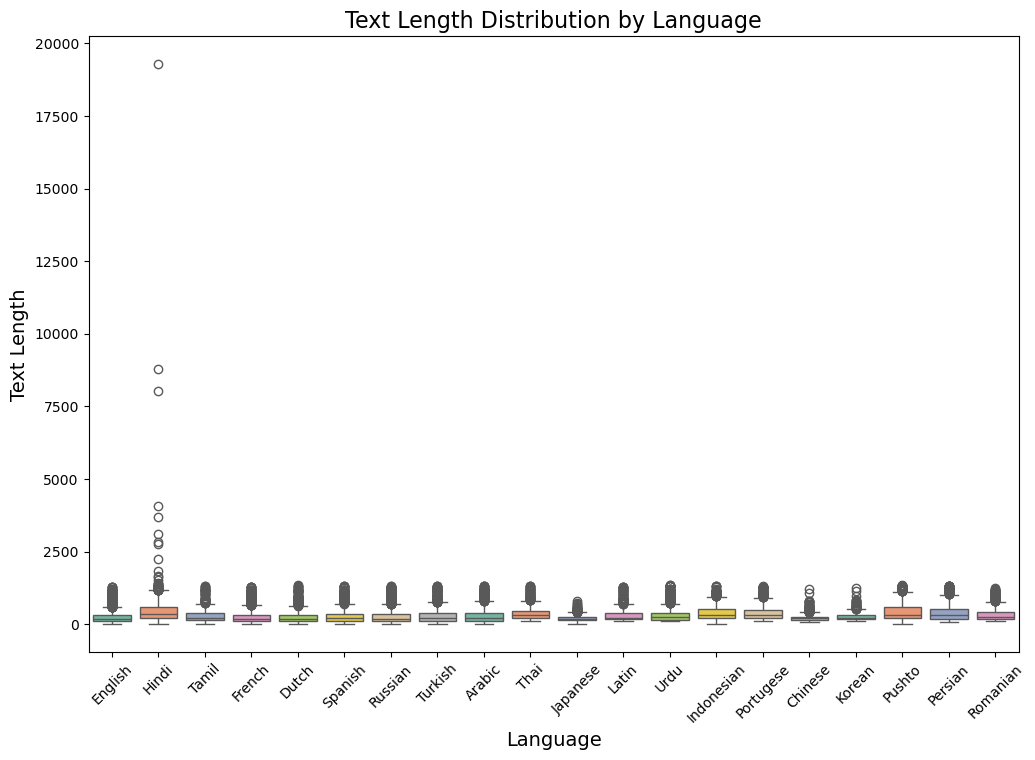

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add a column for text length (if not already created)
df['Text_Length'] = df['Text'].str.len()

# Filter for the top 10 languages for readability
top_languages = df['Language'].value_counts().head(20).index
filtered_data = df[df['Language'].isin(top_languages)]

# Create a boxplot to visualize text length distribution by language
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_data, x='Language', y='Text_Length', palette='Set2', hue='Language', dodge=False)
plt.title('Text Length Distribution by Language', fontsize=16)
plt.xlabel('Language', fontsize=14)
plt.ylabel('Text Length', fontsize=14)
plt.xticks(rotation=45)
plt.legend([], [], frameon=False)  # Remove redundant legend
plt.show()


In [34]:
df.dropna()

,Text,Language,Text_Length
0,"Nature, in the broadest sense, is the natural...",English,85
1,"""Nature"" can refer to the phenomena of the phy...",English,87
2,"The study of nature is a large, if not the onl...",English,65
3,"Although humans are part of nature, human acti...",English,123
4,[1] The word nature is borrowed from the Old F...,English,194
...,...,...,...
32332,hors du terrain les années et sont des année...,French,1130
32333,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...,Thai,201
32334,con motivo de la celebración del septuagésimoq...,Spanish,432
32335,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...,Chinese,203


In [35]:
duplicates = df.duplicated(subset='Text', keep=False)
print(f"Number of duplicate entries: {duplicates.sum()}")

# Remove duplicates
df = df.drop_duplicates(subset='Text')
print(f"Dataset size after removing duplicates: {df.shape[0]}")

Number of duplicate entries: 310
Dataset size after removing duplicates: 32117


In [39]:
unique_languages = df['Language'].unique()
print(f"Unique languages: {unique_languages}")

# Check for extremely short text entries
short_texts = df[df['Text_Length'] < 5]
print(f"Number of extremely short text entries: {len(short_texts)}")

Unique languages: ['English' 'Malayalam' 'Hindi' 'Tamil' 'Portugeese' 'French' 'Dutch'
 'Spanish' 'Greek' 'Russian' 'Danish' 'Italian' 'Turkish' 'Sweedish'
 'Arabic' 'German' 'Kannada' 'Estonian' 'Swedish' 'Thai' 'Japanese'
 'Latin' 'Urdu' 'Indonesian' 'Portugese' 'Chinese' 'Korean' 'Pushto'
 'Persian' 'Romanian']
Number of extremely short text entries: 7


In [41]:
import re
from collections import Counter

In [43]:
def clean_text_regex(text):
    if isinstance(text, str):  # Ensure the value is a string
        text = text.strip()  # Remove leading and trailing spaces
        text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation (non-word characters)
    return text

df.loc[:, 'Text'] = df['Text'].apply(clean_text_regex)


# Display the cleaned DataFrame
print(df.head())

                                                Text Language  Text_Length
0  nature in the broadest sense is the natural ph...  English           85
1  nature can refer to the phenomena of the physi...  English           87
2  the study of nature is a large if not the only...  English           65
3  although humans are part of nature human activ...  English          123
4  1 the word nature is borrowed from the old fre...  English          194


In [44]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Extract the text column
texts = df['Text']

# Tokenization
tokenizer = Tokenizer(num_words=20000, oov_token="<OOV>")  # Adjust num_words as needed
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Padding
max_length = 100  
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

print(f"Example tokenized sequence: {sequences[0]}")
print(f"Example padded sequence: {padded_sequences[0]}")

# Save the tokenizer for future use
import pickle
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)


Example tokenized sequence: [353, 8, 5, 1, 7022, 42, 5, 1420, 7023, 1950, 591, 206, 10922]
Example padded sequence: [  353     8     5     1  7022    42     5  1420  7023  1950   591   206
 10922     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]


In [69]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

df.loc[:, 'Language_Encoded'] = label_encoder.fit_transform(df['Language'])
# Display a sample of the encoding
print(df[['Language', 'Language_Encoded']].head())

# Display unique classes
print("Unique classes:", label_encoder.classes_)


  Language  Language_Encoded
0  English                 4
1  English                 4
2  English                 4
3  English                 4
4  English                 4
Unique classes: ['Arabic' 'Chinese' 'Danish' 'Dutch' 'English' 'Estonian' 'French'
 'German' 'Greek' 'Hindi' 'Indonesian' 'Italian' 'Japanese' 'Kannada'
 'Korean' 'Latin' 'Malayalam' 'Persian' 'Portugeese' 'Portugese' 'Pushto'
 'Romanian' 'Russian' 'Spanish' 'Swedish' 'Sweedish' 'Tamil' 'Thai'
 'Turkish' 'Urdu']


In [47]:
encoded_labels = df['Language_Encoded']

In [71]:
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Input,Embedding
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

# Assuming padded_sequences and encoded_labels are preprocessed correctly
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, encoded_labels, test_size=0.2, random_state=42)


# Build the GRU Model
model_GRU = Sequential([
    Input(shape=(100,)),
    Embedding(input_dim=20000,output_dim=128),
    GRU(64,return_sequences=True),
    GRU(64),
    Dense(32,activation='relu'),
    Dropout(0.5),
    Dense(30,activation='softmax')
])

# Compile the Model
model_GRU.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the Model
model_GRU.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

# Evaluate the Model
eval_loss, eval_accuracy = model_GRU.evaluate(X_test, y_test)
print(f"Test Loss: {eval_loss:.4f}, Test Accuracy: {eval_accuracy:.4f}")

# Optional: Summarize the Model
model_GRU.summary()

Epoch 1/10
643/643 ━━━━━━━━━━━━━━━━━━━━ 145s 209ms/step - accuracy: 0.0736 - loss: 3.3079 - val_accuracy: 0.2358 - val_loss: 2.5538
Epoch 2/10
643/643 ━━━━━━━━━━━━━━━━━━━━ 132s 205ms/step - accuracy: 0.2698 - loss: 2.3368 - val_accuracy: 0.6490 - val_loss: 1.1641
Epoch 3/10
643/643 ━━━━━━━━━━━━━━━━━━━━ 121s 188ms/step - accuracy: 0.6159 - loss: 1.2558 - val_accuracy: 0.8212 - val_loss: 0.6045
Epoch 4/10
643/643 ━━━━━━━━━━━━━━━━━━━━ 123s 192ms/step - accuracy: 0.7557 - loss: 0.7856 - val_accuracy: 0.8864 - val_loss: 0.4121
Epoch 5/10
643/643 ━━━━━━━━━━━━━━━━━━━━ 121s 188ms/step - accuracy: 0.8218 - loss: 0.5781 - val_accuracy: 0.9025 - val_loss: 0.3607
Epoch 6/10
643/643 ━━━━━━━━━━━━━━━━━━━━ 121s 187ms/step - accuracy: 0.8563 - loss: 0.4655 - val_accuracy: 0.9103 - val_loss: 0.3614
Epoch 7/10
643/643 ━━━━━━━━━━━━━━━━━━━━ 126s 196ms/step - accuracy: 0.8745 - loss: 0.3870 - val_accuracy: 0.9161 - val_loss: 0.3513
Epoch 8/10
643/643 ━━━━━━━━━━━━━━━━━━━━ 122s 190ms/step - accuracy: 0.8865 -

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 128)            │       2,560,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ (None, 100, 64)             │          37,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 64)                  │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 30)                  │             990 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,875,836 (30.04 MB)

 Trainable params: 2,625,278 (10.01 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,250,558 (20.03 MB)

In [65]:
# Save GRU model
model_GRU.save('model_gru.keras')

In [73]:
model = model_GRU 

# Real-time prediction loop
print("Real-time Language Prediction (type 'exit' to quit)\n")
while True:
    # Get input from the user
    user_input = input("Enter text to predict its language (or type 'exit' to quit): ")

    # Exit condition
    if user_input.lower() == 'exit':
        print("Exiting prediction loop.")
        break

    # Step 1: Clean the input text
    cleaned_input = clean_text_regex(user_input)

    # Step 2: Tokenize and pad the input
    sequence = tokenizer.texts_to_sequences([cleaned_input])  # Convert to sequence
    padded_sequence = pad_sequences(sequence, maxlen=100, padding='post', truncating='post')

    # Step 3: Predict the language
    prediction = model.predict(padded_sequence)

    # Step 4: Decode the predicted class using label_encoder (assumed to be in memory)
    predicted_class = np.argmax(prediction, axis=1)  # Get class index
    predicted_language = label_encoder.inverse_transform(predicted_class)

    # Print the predicted language
    print(f"Predicted Language: {predicted_language[0]}\n")


Real-time Language Prediction (type 'exit' to quit)



Enter text to predict its language (or type 'exit' to quit):  nature is beautiful


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
Predicted Language: Japanese



Enter text to predict its language (or type 'exit' to quit):  exit


Exiting prediction loop.


In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

# Assuming padded_sequences and encoded_labels are preprocessed correctly
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, encoded_labels, test_size=0.2, random_state=42)

# Build the LSTM Model
model_LSTM = Sequential([
        Embedding(input_dim=20000, output_dim=128),
        LSTM(64, return_sequences=True),
        LSTM(64),
        Dense(64, activation='softplus'),
        Dropout(0.5),
        Dense(30, activation='softmax')
    ])

# Compile the Model
model_LSTM.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the Model
model_LSTM.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

# Evaluate the Model
eval_loss, eval_accuracy = model_LSTM.evaluate(X_test, y_test)
print(f"Test Loss: {eval_loss:.4f}, Test Accuracy: {eval_accuracy:.4f}")

# Optional: Summarize the Model
model_LSTM.summary()



Epoch 1/10
643/643 ━━━━━━━━━━━━━━━━━━━━ 119s 171ms/step - accuracy: 0.0610 - loss: 3.4249 - val_accuracy: 0.1191 - val_loss: 3.0240
Epoch 2/10
643/643 ━━━━━━━━━━━━━━━━━━━━ 109s 169ms/step - accuracy: 0.1211 - loss: 2.9727 - val_accuracy: 0.2137 - val_loss: 2.5645
Epoch 3/10
643/643 ━━━━━━━━━━━━━━━━━━━━ 106s 165ms/step - accuracy: 0.2018 - loss: 2.5297 - val_accuracy: 0.3289 - val_loss: 1.9927
Epoch 4/10
643/643 ━━━━━━━━━━━━━━━━━━━━ 101s 157ms/step - accuracy: 0.3153 - loss: 2.0155 - val_accuracy: 0.5017 - val_loss: 1.4991
Epoch 5/10
643/643 ━━━━━━━━━━━━━━━━━━━━ 101s 156ms/step - accuracy: 0.4960 - loss: 1.4540 - val_accuracy: 0.6198 - val_loss: 1.0680
Epoch 6/10
643/643 ━━━━━━━━━━━━━━━━━━━━ 101s 157ms/step - accuracy: 0.6188 - loss: 1.1069 - val_accuracy: 0.7554 - val_loss: 0.7423
Epoch 7/10
643/643 ━━━━━━━━━━━━━━━━━━━━ 100s 155ms/step - accuracy: 0.7664 - loss: 0.7425 - val_accuracy: 0.8299 - val_loss: 0.5550
Epoch 8/10
643/643 ━━━━━━━━━━━━━━━━━━━━ 99s 154ms/step - accuracy: 0.8378 - 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 100, 128)            │       2,560,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 100, 64)             │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 30)                  │           1,950 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,945,628 (30.31 MB)

 Trainable params: 2,648,542 (10.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,297,086 (20.21 MB)

In [67]:
model_LSTM.save('model_lstm.keras')